# API methods

### Interest Over Time: 
    returns historical, indexed data for when the keyword was searched most as shown on Google Trends' Interest Over Time section.

### Historical Hourly Interest: 
    returns historical, indexed, hourly data for when the keyword was searched most as shown on Google Trends' Interest Over Time section. It sends multiple requests to Google, each retrieving one week of hourly data. It seems like this would be the only way to get historical, hourly data.

### Interest by Region: 
    returns data for where the keyword is most searched as shown on Google Trends' Interest by Region section.

### Related Topics:
    returns data for the related keywords to a provided keyword shown on Google Trends' Related Topics section.

### Related Queries: 
    returns data for the related keywords to a provided keyword shown on Google Trends' Related Queries section.

### Trending Searches: 
    returns data for latest trending searches shown on Google Trends' Trending Searches section.

### Top Charts: 
    returns the data for a given topic shown in Google Trends' Top Charts section.

### Suggestions: 
    returns a list of additional suggested keywords that can be used to refine a trend search.

## 取得近期趨勢

In [22]:
pytrends.trending_searches(pn='taiwan')

,0
0,蓋亞那
1,鳳山霸凌
2,角頭浪流連
3,穩懋
4,李婉鈺
5,人人影視
6,延後開學
7,石原聰美
8,黃宥嘉
9,韋禮安


In [23]:
pytrends.trending_searches(pn='japan')

,0
0,川上洋平
1,ソニー
2,崎山蒼志
3,恵方巻き
4,豊田剛一郎
5,たこやきレインボー
6,立春
7,オオスミタケシ
8,メドレー
9,COCOA


In [9]:
pytrends.top_charts(2020)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


## 指定關鍵字

In [1]:
import pandas as pd
import typing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pytrends.request import TrendReq
pytrends = TrendReq(hl='zh-TW', tz=480)

In [2]:
plt.rcParams['font.sans-serif'] = ['Microsoft Jhenghei']

In [10]:
def get_trend(keyword: str, timeframe: str, topk=20) -> pd.DataFrame:
    pytrends.build_payload([keyword], timeframe=timeframe)
    
    df_region = pytrends.interest_by_region()
    df_region.sort_values(keyword, ascending=False, inplace=True)
    
    df_time = pytrends.interest_over_time()
    df_time.sort_values(keyword, ascending=False, inplace=True)
    df_time = df_time.head(topk)
    df_time = df_time.reset_index()
    
    df_time.plot(x='date', y=keyword, figsize=(20, 10));
    
    return df_region, df_time

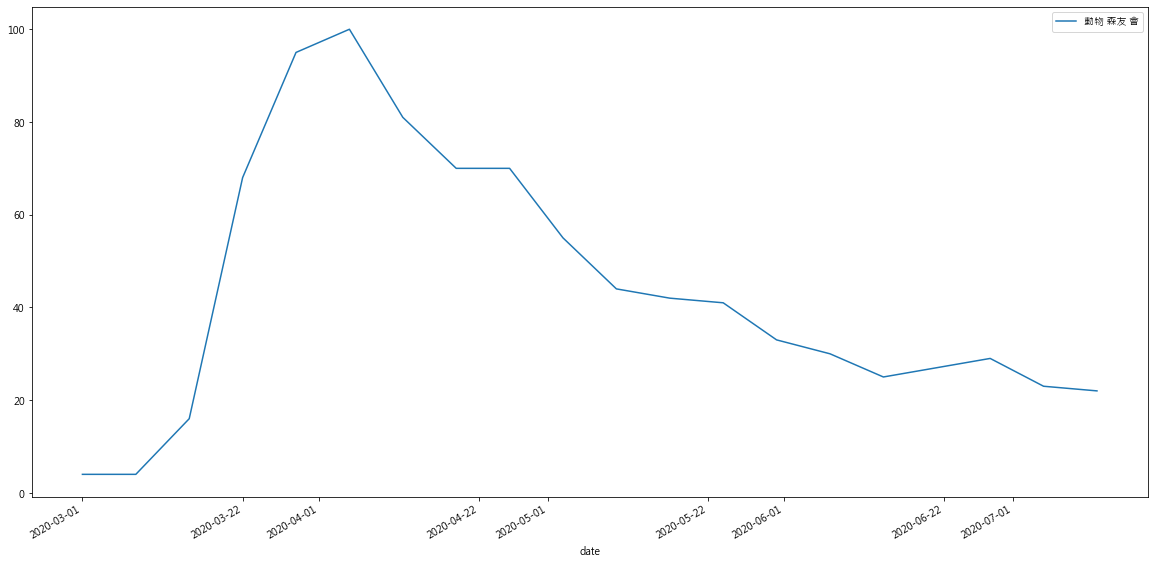

In [4]:
# 設定關鍵字、取得資料
kw = '動物 森友 會'
timeframe = '2018-01-01 2020-07-14'
df_region, df_time = get_trend(kw, timeframe)

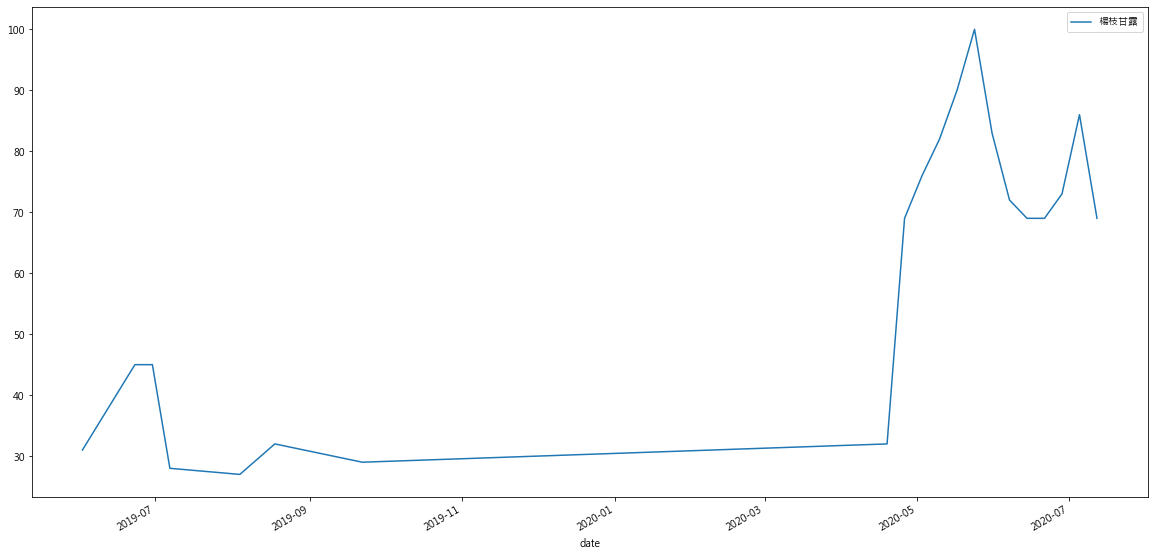

In [6]:
kw = '楊枝甘露'
timeframe = '2016-01-01 2020-07-14'
df_region, df_time = get_trend(kw, timeframe)

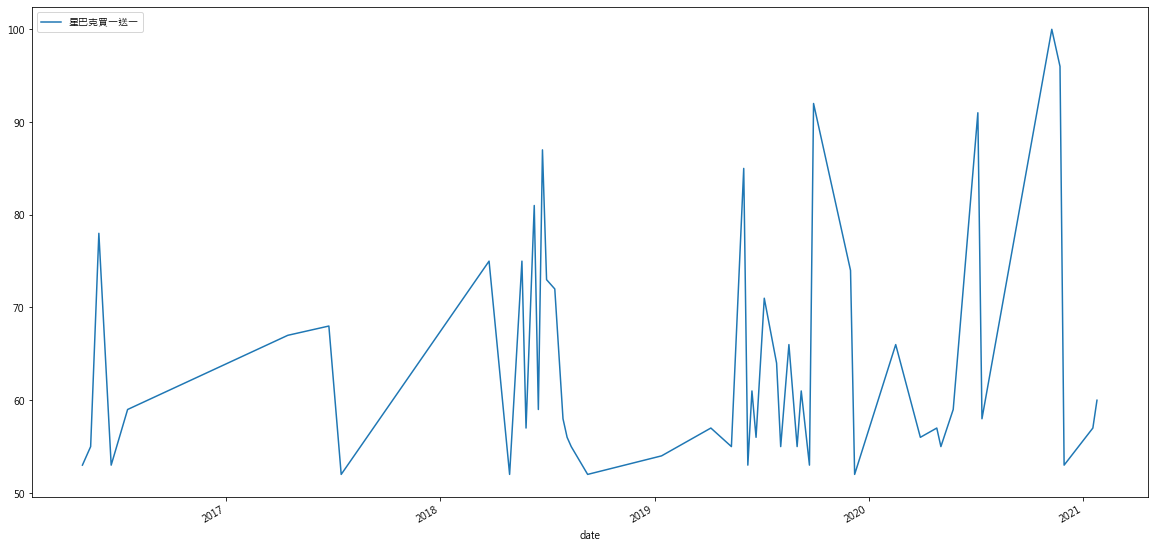

In [11]:
kw = '星巴克買一送一'
timeframe = '2016-01-01 2021-01-31'
df_region, df_time = get_trend(kw, timeframe, 50)